In [1]:
import numpy as np
import torch

import matplotlib.pyplot as plt
import pandas as pd 

from train import TrainerDAGMM
from test import eval
from preprocess import get_KDDCup99

In [2]:
class Args:
    num_epochs=200
    patience=50
    lr=1e-3
    lr_milestones=[50]
    batch_size=1024
    latent_dim=1
    n_gmm=4
    lambda_energy=0.1
    lambda_cov=0.005
    lambda_recon=1.0
    lambda_kl=0.01
    
    
args = Args()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
data = get_KDDCup99(args)

dagmm = TrainerDAGMM(args, data, device)
dagmm.train()

  1024/198371: [>...............................] - ETA 0.0s

l:\LIFE_JIAHUI\UVA\2024_spring\CS6501_Network Securty and Privacy\project\PyTorch-DAGMM-Variants\forward_step.py:48: UserWarning: torch.cholesky is deprecated in favor of torch.linalg.cholesky and will be removed in a future PyTorch release.
L = torch.cholesky(A)
should be replaced with
L = torch.linalg.cholesky(A)
and
U = torch.cholesky(A, upper=True)
should be replaced with
U = torch.linalg.cholesky(A).mH
This transform will produce equivalent results for all valid (symmetric positive definite) inputs. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\BatchLinearAlgebra.cpp:1703.)
  det_cov.append((torch.cholesky(cov_k * (2 * np.pi)).diag().prod()).unsqueeze(0))


198371/198371: [===============================>] - ETA 0.2ss
Training DAGMM... Epoch: 0, Loss: 29.814
198371/198371: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 1, Loss: 29.847
198371/198371: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 2, Loss: 29.716
198371/198371: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 3, Loss: 29.785
198371/198371: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 4, Loss: 29.793
198371/198371: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 5, Loss: 29.932
198371/198371: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 6, Loss: 29.816
198371/198371: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 7, Loss: 29.785
198371/198371: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 8, Loss: 29.853
198371/198371: [===============================>] - ETA 0.0s
Training DAGMM... Ep

In [3]:
from test import eval

labels, scores = eval(dagmm.model, data, device, args.n_gmm)

Testing...


_LinAlgError: cholesky: The factorization could not be completed because the input is not positive-definite (the leading minor of order 1 is not positive-definite).

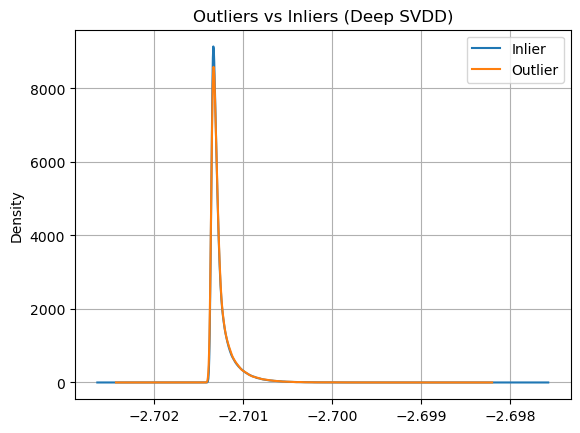

In [8]:
scores_in = scores[np.where(labels==0)[0]]
scores_out = scores[np.where(labels==1)[0]]


in_ = pd.DataFrame(scores_in, columns=['Inlier'])
out_ = pd.DataFrame(scores_out, columns=['Outlier'])


fig, ax = plt.subplots()
in_.plot.kde(ax=ax, legend=True, title='Outliers vs Inliers (Deep SVDD)')
out_.plot.kde(ax=ax, legend=True)
ax.grid(axis='x')
ax.grid(axis='y')
plt.show()